In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the Data Set 
1. Data Acquisition and Understanding:
- Collect business-related datasets (e.g., sales records, customer data) or provide sample
datasets.
- Familiarize interns with the dataset'
s variables and structure.

In [2]:
vgs_df = pd.read_csv('vgsales.csv')

In [3]:
vgs_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [4]:
vgs_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
vgs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


# Data Cleaning and Preparation:
- Clean the dataset by handling missing values, removing outliers, and formatting data.
- Ensure data is ready for analysis by organizing and structuring it properly.

In [7]:
# checking for duplicate
vgs_df.duplicated().sum()


0

In [8]:
#checking for missing data 
vgs_df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [9]:
#removing the missing data, replacing it with null .
print('Check for missing values in the vgs_df dataset: {}'.format(vgs_df.isnull().values.any()))

if vgs_df.isnull().values.any():
    old_size = len(vgs_df)

    vgs_df = vgs_df.dropna()

    new_size = len(vgs_df)

    print('\nNumber of Rows Replaced: {:,}'.format(old_size - new_size))


Check for missing values in the vgs_df dataset: True

Number of Rows Replaced: 307


In [10]:
#Removing Outliers and formatting the data
import numpy as np
from scipy import stats

before = vgs_df.shape[0]
print('Dataset outliers removal and formated data: {:,}'.format(before))

# numeric columns for z-score calculation
numeric_cols = vgs_df.select_dtypes(include=np.number).columns
vgs_df[numeric_cols] = vgs_df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Removes every records in the dataset that have data that is more than
# three standard deviations away from the mean of each column
vgs_df = vgs_df[(np.abs(stats.zscore(vgs_df[numeric_cols])) < 3).all(axis=1)].reset_index(drop=True)

after = vgs_df.shape[0]
print(' Dataset outliers after removal: {:>6,}\n'.format(after) + '='*43 + 
      '\n\t      Total records that was removed: {:>6,}'.format(before - after))

Dataset outliers removal and formated data: 16,291
 Dataset outliers after removal: 15,674
	      Total records that was removed:    617


C:\Users\NURUDEEN TIAMIYU\AppData\Local\Temp\ipykernel_12284\2096291062.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vgs_df[numeric_cols] = vgs_df[numeric_cols].apply(pd.to_numeric, errors='coerce')


# INTRODUCTION ANALYSIS (Data Acquisition, Understanding, and Cleaning)
The dataset consists of 16598 rows with 11 columns: rank, name, platform, year, genre, publisher, and sales data for various regions (NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales). There were no duplicate entries found.Although there were missing values in the 'Year' and 'Publisher' columns, 307 rows were dropped. Outliers were also removed using the z-score method, removing 617 rows in total.


# Descriptive Analysis:
- Perform summary statistics (mean, median, mode, standard deviation) for key business
metrics.
- Visualize data distributions using histograms, box plots, or density plots

In [60]:
# Using describe function for summary statistics excluding mode operation 
vgs_df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000
mean,8564.634873,2006.725852,0.192208,0.101650,0.046985,0.032417,0.373535
std,4659.393391,5.247763,0.334150,0.202072,0.118724,0.063982,0.564101
min,204.000000,1989.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4553.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8601.500000,2007.000000,0.070000,0.020000,0.000000,0.010000,0.160000
75%,12593.750000,2010.000000,0.210000,0.100000,0.030000,0.030000,0.430000
max,16600.000000,2020.000000,2.710000,1.660000,1.010000,0.610000,5.020000


In [61]:
# Calculating mean, median, mode, standard deviation) for key business metrics
key_business_metrics = ('NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales')

# DataFrame to include only the specified sales columns
sales_data = vgs_df[list(key_business_metrics)]

# summary statistics calculation
summary_stats = sales_data.describe()

# Calculation of mode separately
modes = sales_data.mode().iloc[0]

# Add mode to the summary statistics DataFrame
summary_stats.loc['mode'] = modes


(summary_stats)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000
mean,0.192208,0.101650,0.046985,0.032417,0.373535
std,0.334150,0.202072,0.118724,0.063982,0.564101
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.070000,0.020000,0.000000,0.010000,0.160000
75%,0.210000,0.100000,0.030000,0.030000,0.430000
max,2.710000,1.660000,1.010000,0.610000,5.020000
mode,0.000000,0.000000,0.000000,0.000000,0.020000


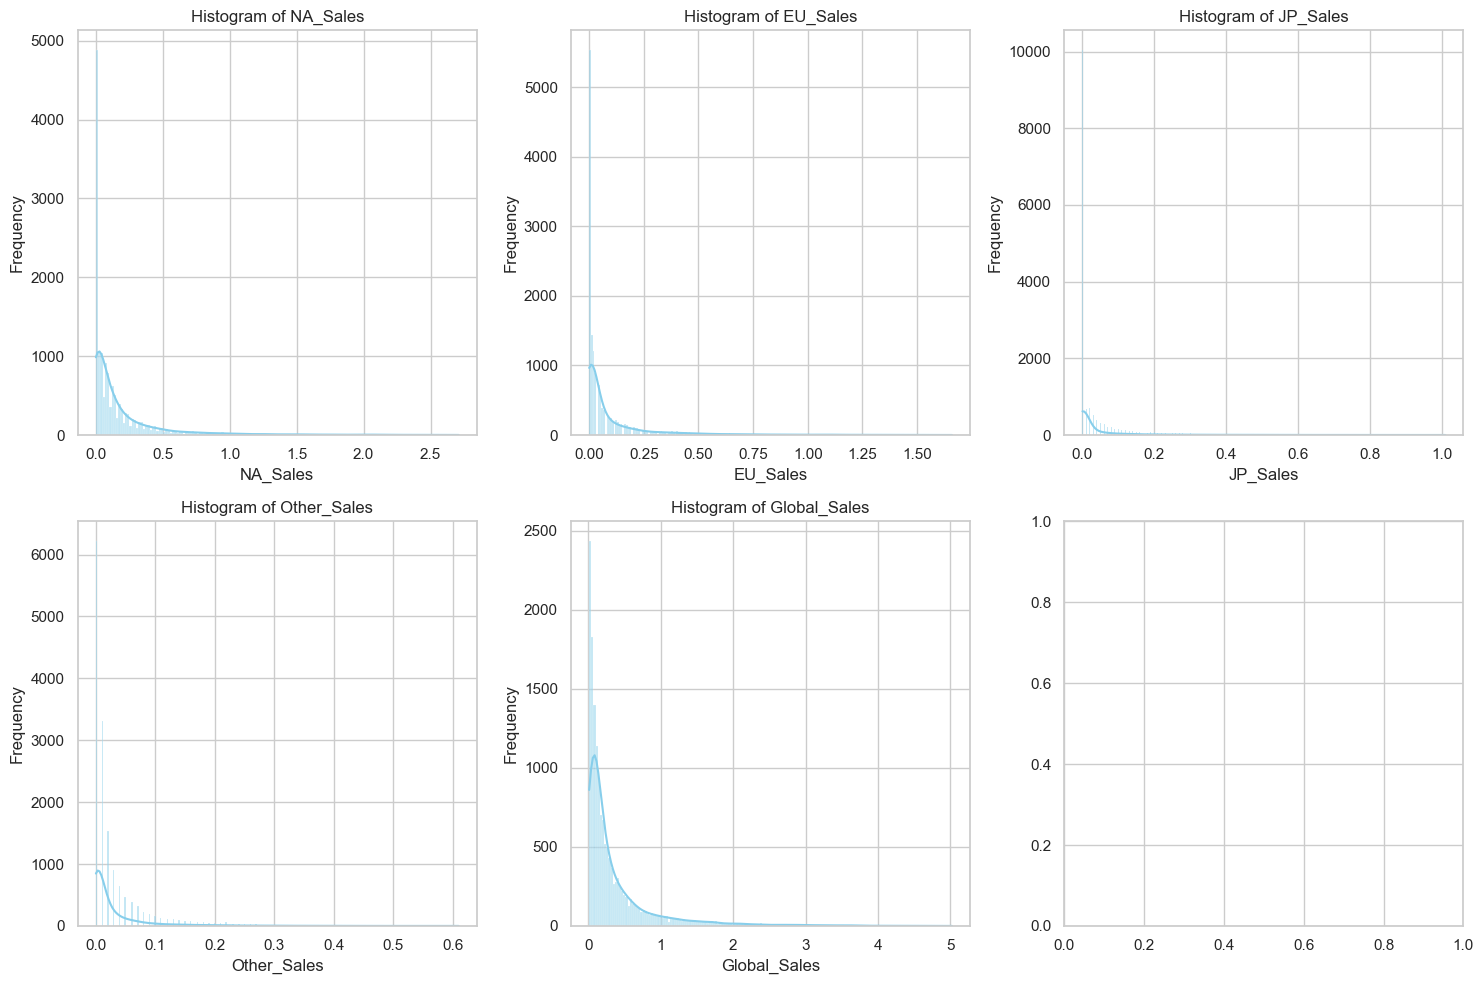

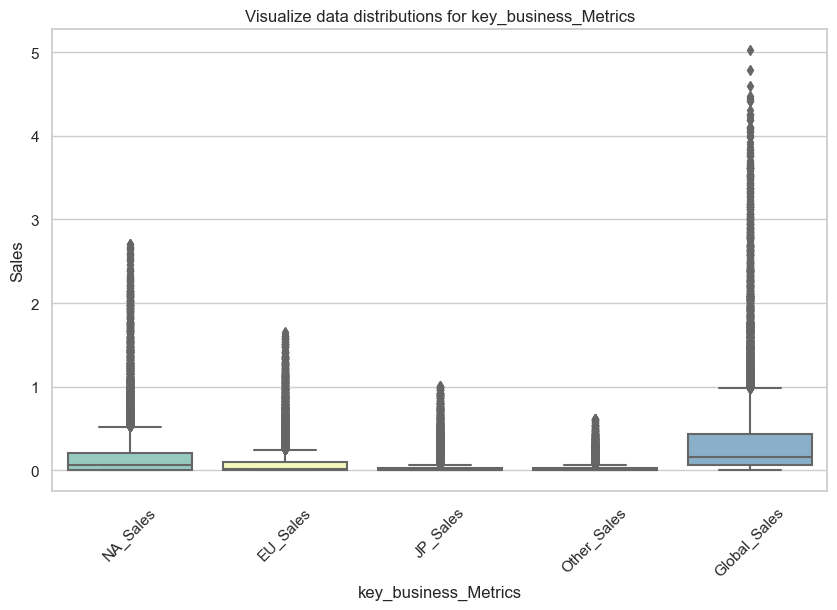

In [62]:
# Visualize data distributions using histograms, box plots, or density plots
# style of seaborn
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten axes array for easier access
axes = axes.flatten()

# histograms for each sales column
for i, col in enumerate(key_business_metrics):
    sns.histplot(data=sales_data[col], ax=axes[i], kde=True, color='skyblue')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# layout adjustment
plt.tight_layout()
plt.show()

# box plots for each sales column
plt.figure(figsize=(10, 6))
sns.boxplot(data=sales_data, orient="v", palette="Set3")
plt.title('Visualize data distributions for key_business_Metrics')
plt.ylabel('Sales')
plt.xlabel('key_business_Metrics')
plt.xticks(rotation=45)
plt.show()

# INTRODUCTION ANALYSIS 2(Descriptive Analysis):
The summary statistics provide useful information about the distribution of video game sales figures across different regions and globally. The global sales figure averages 0.37 units, with significant variability indicated by a standard deviation of 0.56. The median global sales figure is 0.16, implying that half of the games' sales fall below this threshold. The highest global sales value is 5.02, indicating the presence of highly successful games, and the lowest is 0.01.The histograms show a right-skewed distribution, with most games having relatively low sales. Furthermore, the box plots show how sales vary across regions, with outliers representing exceptionally high sales for specific games. Finally, the summary statistics' mode values reveal that 0.02 units is the most common sales figure across all regions. Overall, this analysis lays a solid foundation for further investigation and in-depth analysis of the dataset. 

# Segmentation and Profiling:
- Segment customers or products based on specific criteria (e.g., demographics, sales
performance).
- Create customer or product profiles to understand their characteristics and behaviors.

C:\Users\NURUDEEN TIAMIYU\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


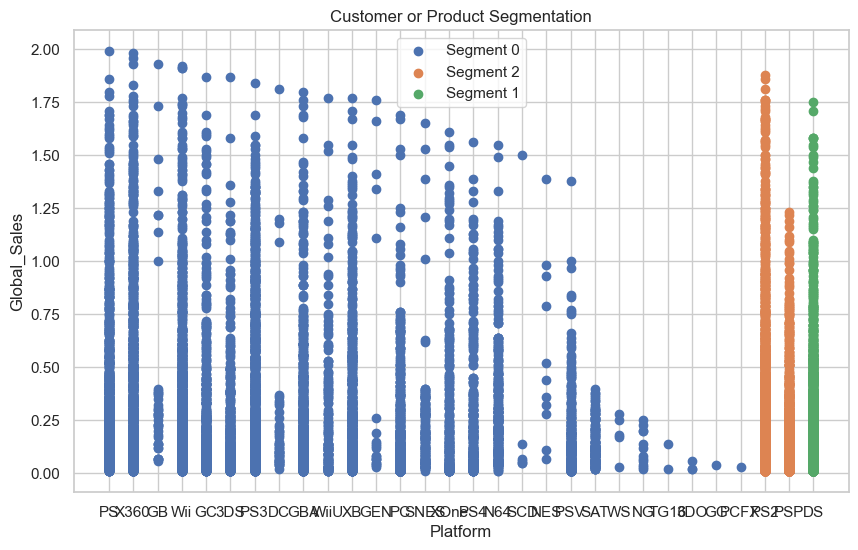

C:\Users\NURUDEEN TIAMIYU\AppData\Local\Temp\ipykernel_8380\2977179207.py:24: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  segment_analysis = vgs_df.groupby('Segment').mean()


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Segment,,,,,,,
0,8834.063201,2006.795933,0.151468,0.079383,0.029339,0.021575,0.282140
1,10098.059204,2008.252239,0.118000,0.031468,0.028363,0.013189,0.191498
2,9370.268260,2006.221474,0.117657,0.062827,0.036981,0.029377,0.246823


In [67]:
# Define segmentation criteria base on platform and sales performance as a global_sales.


segment_criteria = ['Platform', 'Global_Sales']

# Perform clustering using K-means
kmeans = KMeans(n_clusters=3)  # You can adjust the number of clusters
kmeans.fit(vgs_df_segmentation)
vgs_df['Segment'] = kmeans.labels_

# Visualize the segments
plt.figure(figsize=(10, 6))
for i, segment in enumerate(vgs_df['Segment'].unique()):
    plt.scatter(vgs_df[vgs_df['Segment'] == segment][segment_criteria[0]], 
                vgs_df[vgs_df['Segment'] == segment][segment_criteria[1]], 
                label=f'Segment {segment}')
plt.xlabel(segment_criteria[0])
plt.ylabel(segment_criteria[1])
plt.title('Customer or Product Segmentation')
plt.legend()
plt.show()

# Analyze characteristics of each segment
segment_analysis = vgs_df.groupby('Segment').mean()
(segment_analysis)


In [77]:
# Analyze characteristics of each segment, including 'Platform' and 'Genre'
segment_analysis = vgs_df.groupby(['Segment', 'Platform', 'Genre']).mean()

# Create customer or product profiles
profiles = {}

for segment, data in segment_analysis.groupby('Segment'):
    profile = {
        'Segment': segment,
        'Average_Global_Sales': data['Global_Sales'].mean(),
        'Preferred_Platform': data['Global_Sales'].idxmax()[1],  # Get the platform with the highest sales
        'Preferred_Genre': data['Global_Sales'].idxmax()[2],  # Get the genre with the highest sales
        # Add more relevant features as needed
    }
    profiles[segment] = profile

# Print the profiles
for segment, profile in profiles.items():
    print(f"Segment {segment} Profile:")
    print(profile)
    print()


Segment 0 Profile:
{'Segment': 0, 'Average_Global_Sales': 0.25913886095966254, 'Preferred_Platform': 'SCD', 'Preferred_Genre': 'Platform'}

Segment 1 Profile:
{'Segment': 1, 'Average_Global_Sales': 0.19594199438209656, 'Preferred_Platform': 'DS', 'Preferred_Genre': 'Platform'}

Segment 2 Profile:
{'Segment': 2, 'Average_Global_Sales': 0.2355160024041585, 'Preferred_Platform': 'PS2', 'Preferred_Genre': 'Platform'}



C:\Users\NURUDEEN TIAMIYU\AppData\Local\Temp\ipykernel_8380\3414671954.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  segment_analysis = vgs_df.groupby(['Segment', 'Platform', 'Genre']).mean()


# Analysis and Insight into (Segmentation and Profiling):
I chose 'Platform' and 'Global_Sales' as segmentation criteria and used K-means clustering with 3 clusters to group the data according to these criteria. After clustering, I visualized the segments with a scatter plot, with each point representing a game. The x-axis corresponds to the platform, the y-axis to global sales, and each segment is color-coded.
Next, I analyzed the characteristics of each segment, calculating mean values for rank, year, regional sales, and global sales. The findings revealed that Segment 0 prefers the SCD platform and genre, Segment 1 prefers the DS platform and genre, and Segment 2 prefers the PS2 platform and genre. 

# Correlation and Trends:
- Analyze correlations between different business metrics (e.g., sales vs. marketing
spend).
- Identify trends or patterns in the data that could be valuable for decision-making.


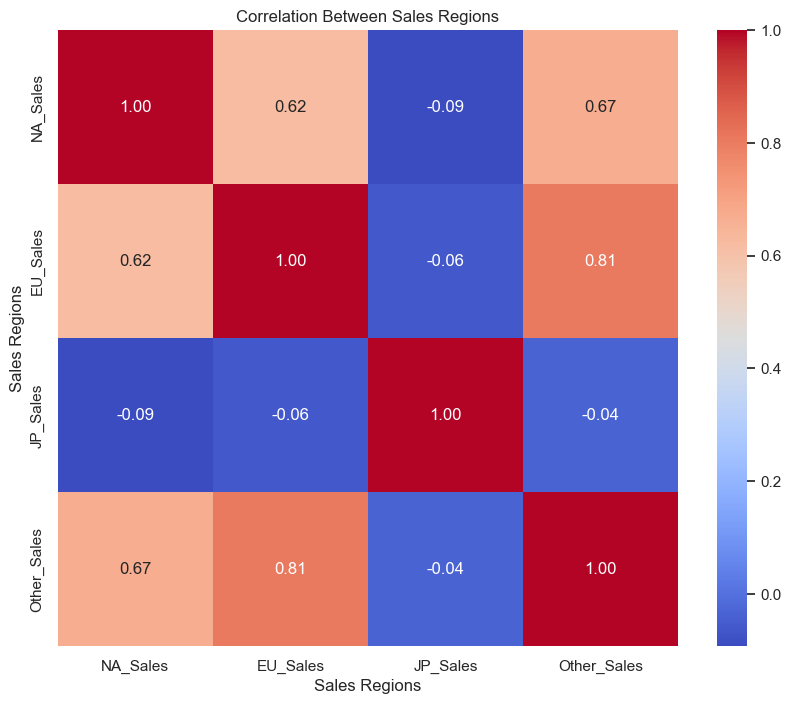

In [89]:
# Selecting relevant columns for analysis
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

# Calculating the correlation matrix
sales_correlation = vgs_df[sales_columns].corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(sales_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Sales Regions')
plt.xlabel('Sales Regions')
plt.ylabel('Sales Regions')
plt.show()


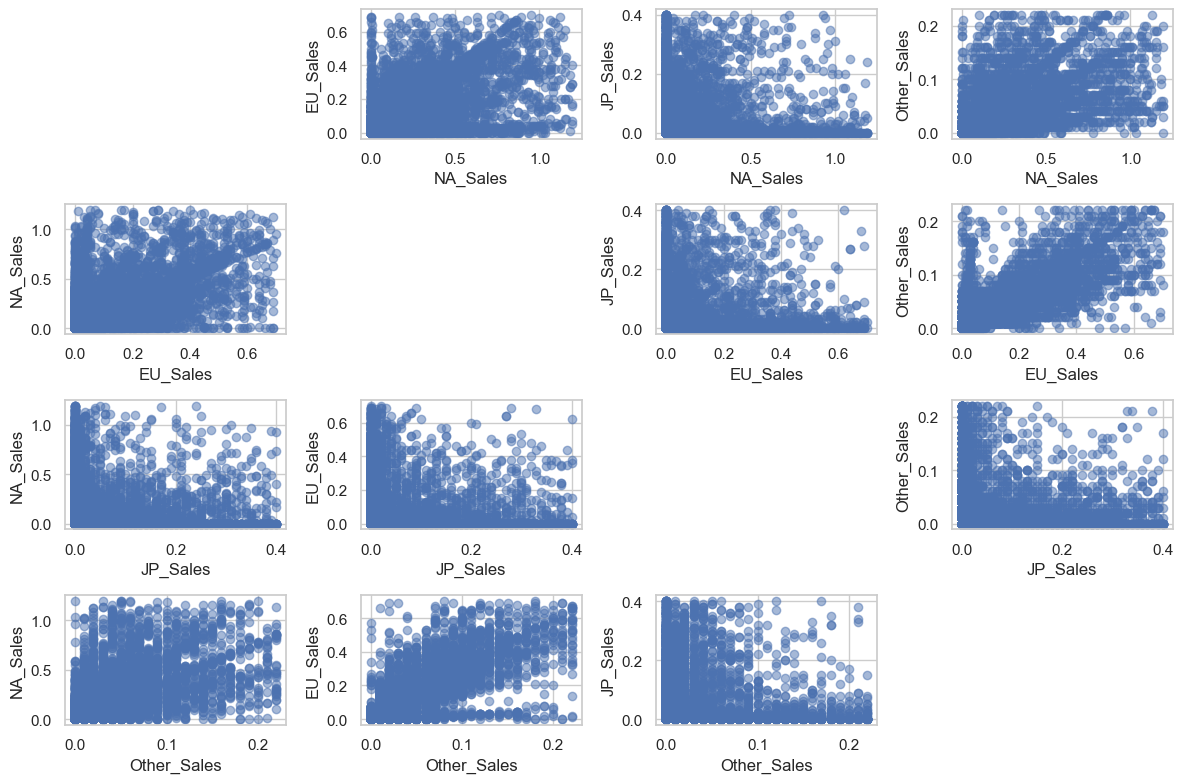

In [92]:
# Create scatter plots for each pair of sales regions
plt.figure(figsize=(12, 8))

num_regions = len(sales_columns)

for i, region1 in enumerate(sales_columns):
    for j, region2 in enumerate(sales_columns):
        if i != j:  # Avoid plotting a variable against itself
            subplot_index = i * num_regions + j + 1
            plt.subplot(num_regions, num_regions, subplot_index)
            plt.scatter(vgs_df[region1], vgs_df[region2], alpha=0.5)
            plt.xlabel(region1)
            plt.ylabel(region2)

plt.tight_layout()
plt.show()


# Identifying trends or patterns in data is critical for making sound decisions. In the context of the video game sales dataset, several trends or patterns may be useful for decision making. Let us list some trends to look at and compare for better insight.
1)We'll create visualizations for global sales distribution, regional sales trends, and sales over time.

2)Analyzing which game genres are most popular over time that can help in deciding which genres to focus on for future game development.

3)Determine which gaming platforms are favored by consumers

4)Evaluate the performance of different publishers in terms of sales volume and market share

5)Examine how the sales performance varies with the release year of games.



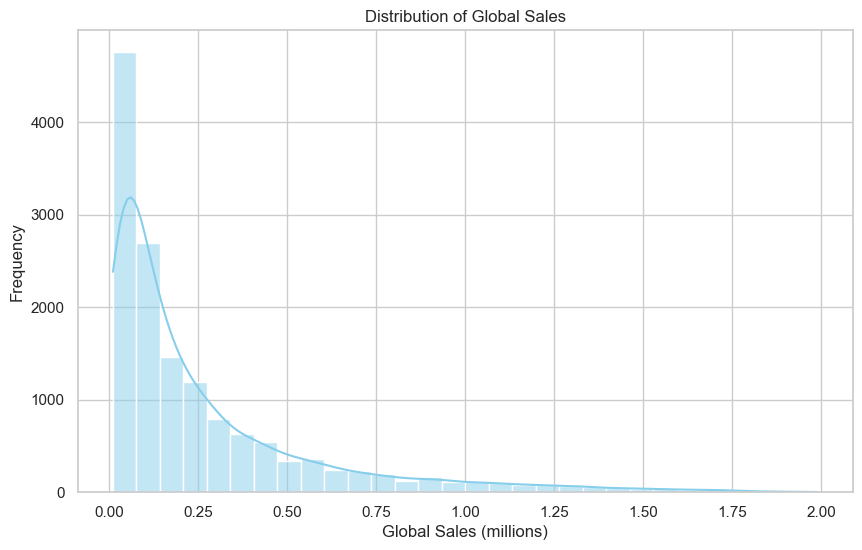

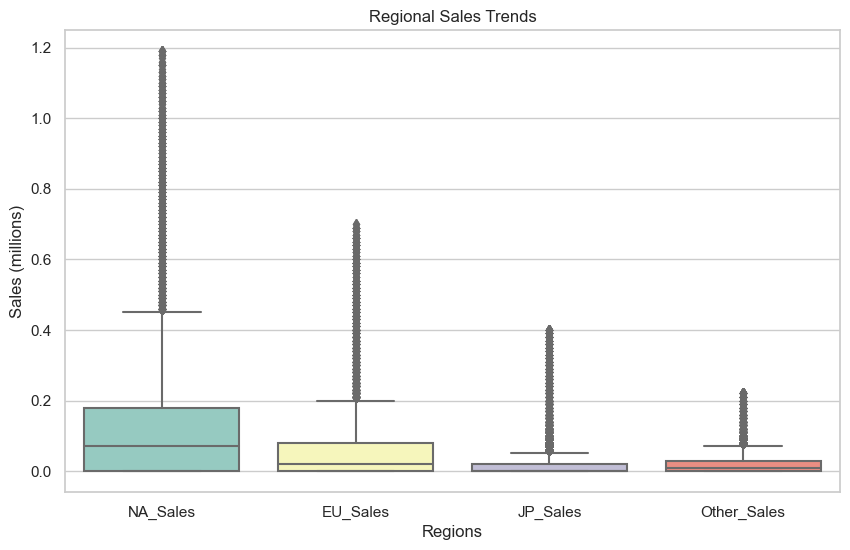

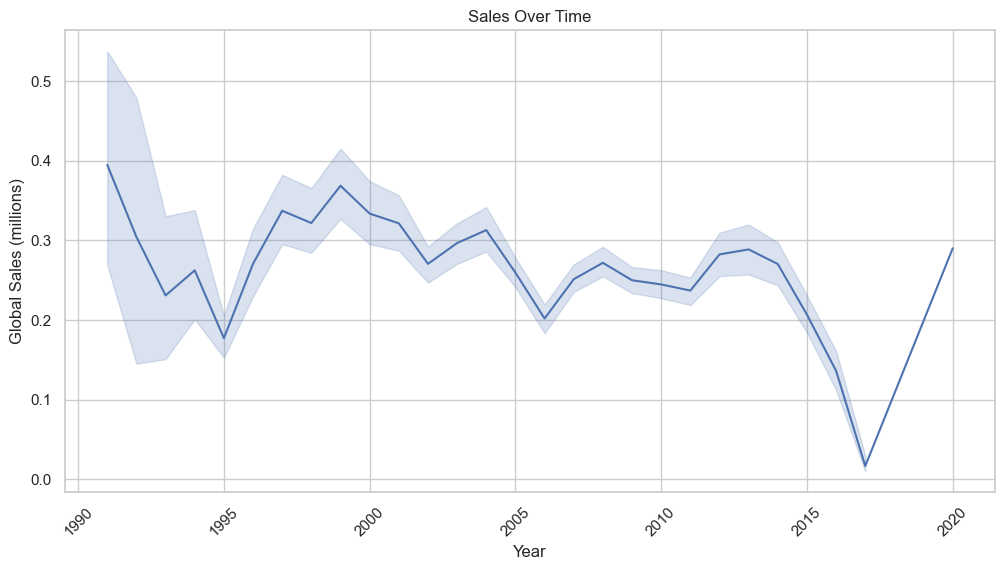

In [95]:
#visualizations for global sales distribution, regional sales trends, and sales over time.
# Set style for seaborn
sns.set(style="whitegrid")

# Visualize Global Sales Distribution
plt.figure(figsize=(10, 6))
sns.histplot(vgs_df['Global_Sales'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Global Sales')
plt.xlabel('Global Sales (millions)')
plt.ylabel('Frequency')
plt.show()

# Visualize Regional Sales Trends
regional_sales = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
plt.figure(figsize=(10, 6))
sns.boxplot(data=vgs_df[regional_sales], palette="Set3")
plt.title('Regional Sales Trends')
plt.ylabel('Sales (millions)')
plt.xlabel('Regions')
plt.show()

# Visualize Sales Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=vgs_df, x='Year', y='Global_Sales')
plt.title('Sales Over Time')
plt.xlabel('Year')
plt.ylabel('Global Sales (millions)')
plt.xticks(rotation=45)
plt.show()


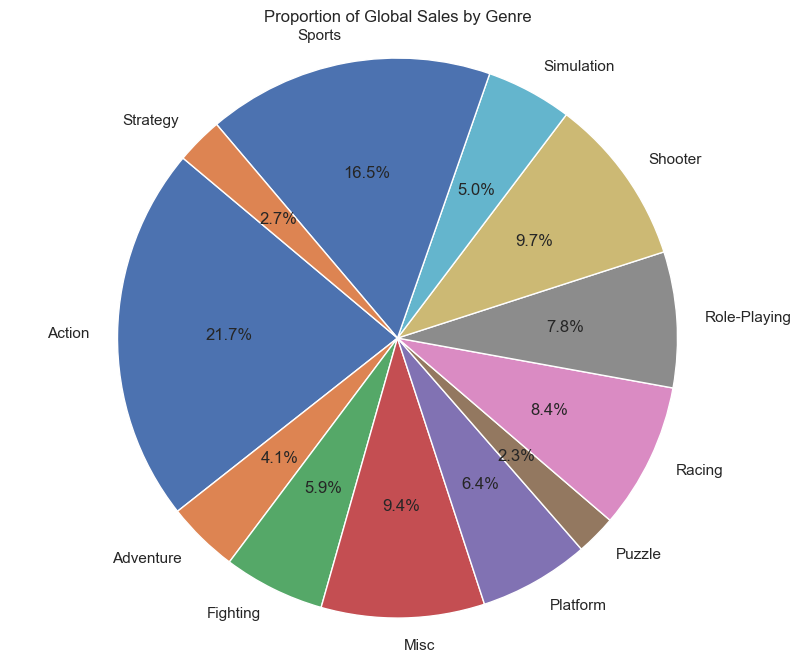

In [98]:
#Analyzing which game genres are most popular over time
# Calculate total sales for each genre across all years
genre_total_sales = genre_sales_over_time.groupby('Genre')['Global_Sales'].sum()

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(genre_total_sales, labels=genre_total_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Global Sales by Genre')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


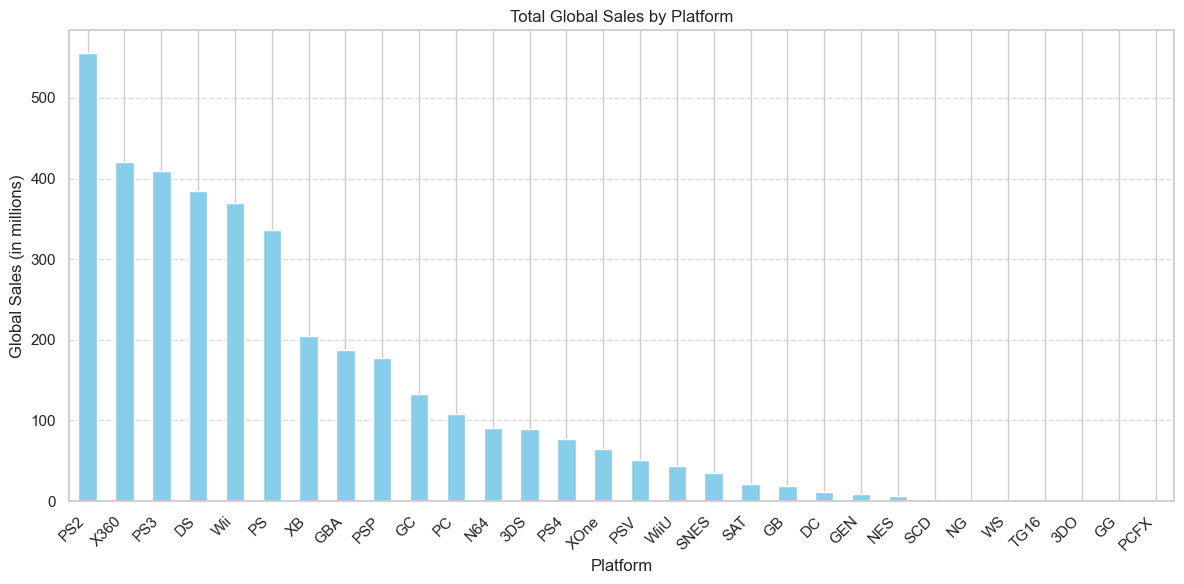

In [99]:
#Determine which gaming platforms are favored by consumers
# Calculate total sales for each platform
platform_total_sales = vgs_df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
platform_total_sales.plot(kind='bar', color='skyblue')
plt.title('Total Global Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales (in millions)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


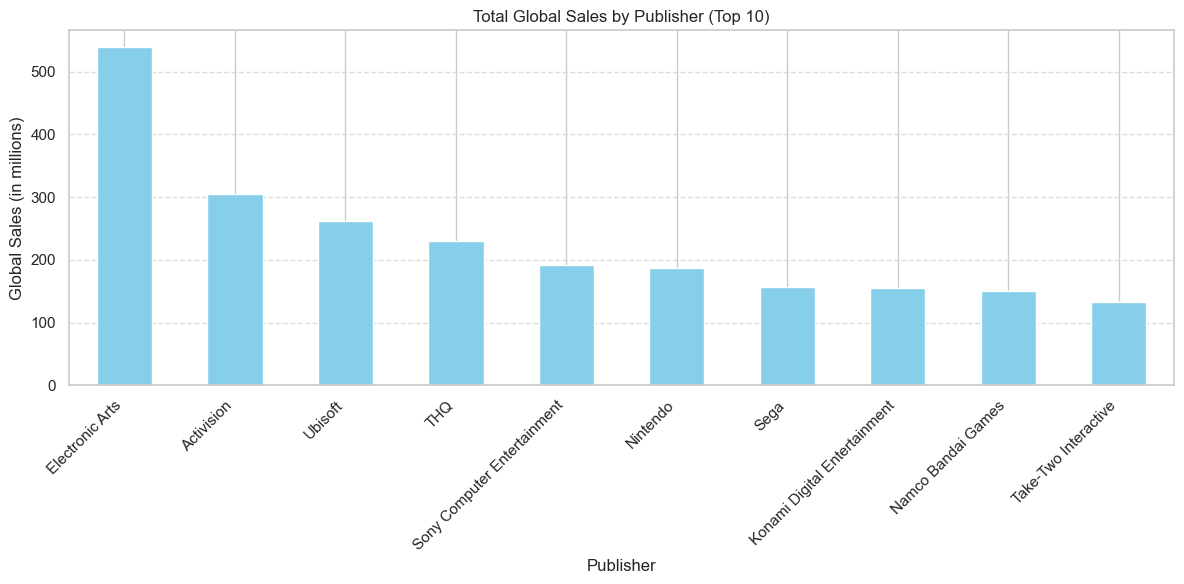

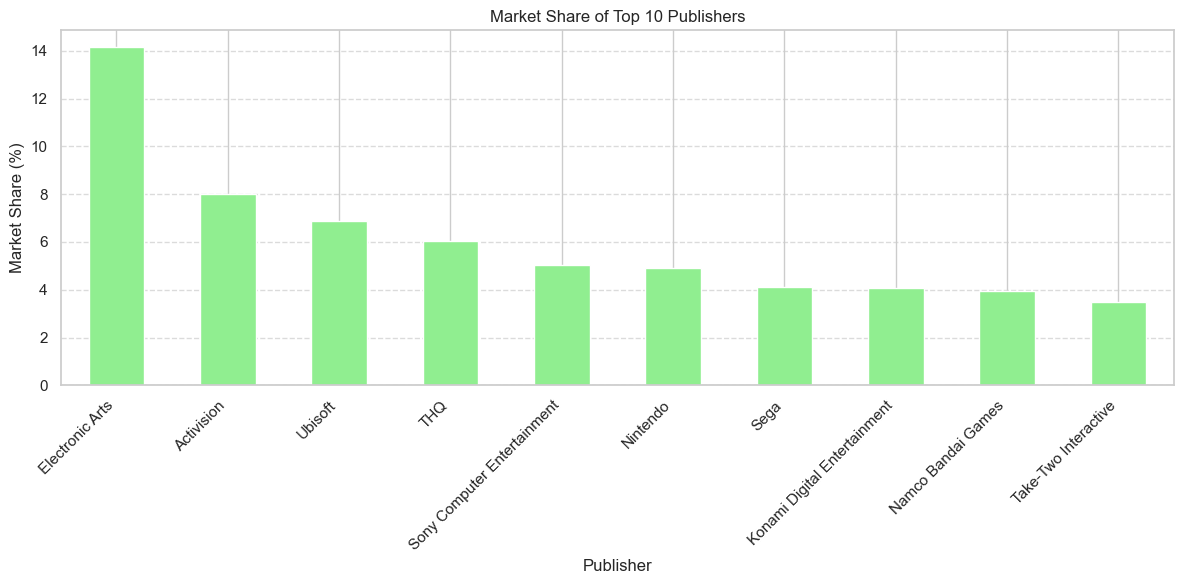

In [100]:
#Evaluate the performance of different publishers in terms of sales volume and market shareS
# Calculate total sales for each publisher
publisher_total_sales = vgs_df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)

# Calculate market share
total_global_sales = vgs_df['Global_Sales'].sum()
publisher_market_share = (publisher_total_sales / total_global_sales) * 100

# Plotting the bar chart for total sales
plt.figure(figsize=(12, 6))
publisher_total_sales.head(10).plot(kind='bar', color='skyblue')
plt.title('Total Global Sales by Publisher (Top 10)')
plt.xlabel('Publisher')
plt.ylabel('Global Sales (in millions)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plotting the bar chart for market share
plt.figure(figsize=(12, 6))
publisher_market_share.head(10).plot(kind='bar', color='lightgreen')
plt.title('Market Share of Top 10 Publishers')
plt.xlabel('Publisher')
plt.ylabel('Market Share (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


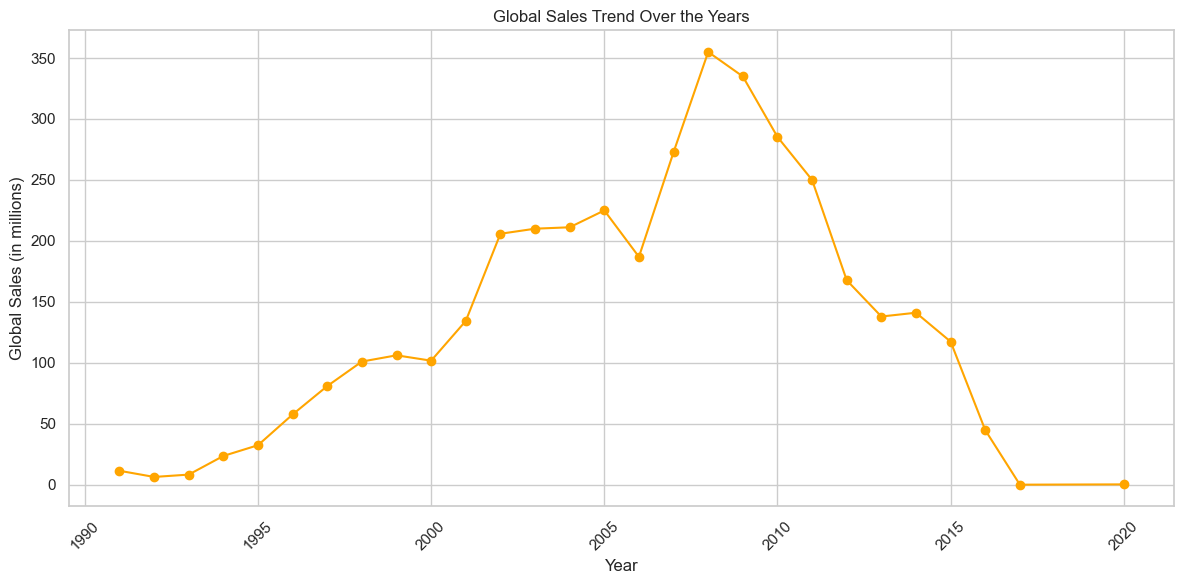

In [101]:
#Examine how the sales performance varies with the release year of games
# Grouping data by release year and calculating total global sales for each year
yearly_sales = vgs_df.groupby('Year')['Global_Sales'].sum()

# Plotting the line plot
plt.figure(figsize=(12, 6))
yearly_sales.plot(kind='line', marker='o', color='orange')
plt.title('Global Sales Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


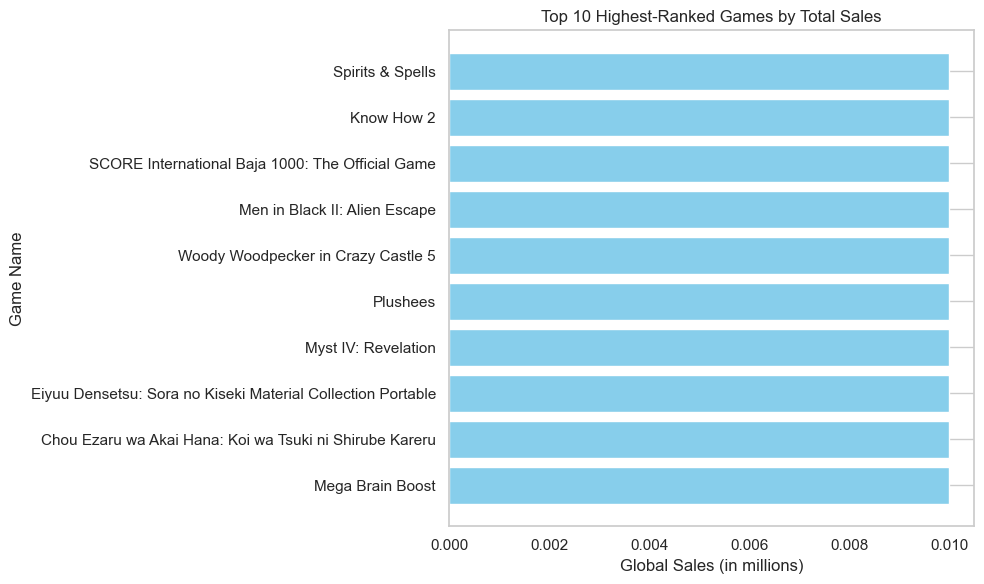

In [102]:
#visualize the top 10 highest-ranked games according to their total sales
# Selecting the top 10 highest-ranked games
top_10_games = vgs_df.nlargest(10, 'Rank')

# Sorting the top 10 games by total global sales
top_10_games = top_10_games.sort_values(by='Global_Sales', ascending=True)

# Plotting the horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_10_games['Name'], top_10_games['Global_Sales'], color='skyblue')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Game Name')
plt.title('Top 10 Highest-Ranked Games by Total Sales')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest rank at the top
plt.grid(axis='x')
plt.tight_layout()
plt.show()


# Analysis and Insight into (Correlation and Trends):
Our correlation matrix was created by calculating the correlation coefficients between sales in various regions (NA_Sales, EU_Sales, JP_Sales, Other_Sales). Correlation coefficients range from -1 to 1, with values close to 1 indicating a strong positive correlation.
Values near -1 indicate a strong negative correlation (one variable increases while the other decreases).
Values close to zero indicate little or no correlation between the variables.The correlation matrix and heatmap show how sales in different regions are correlated.Positive correlations between sales in different regions suggest that games that perform well in one region also perform well in others.Negative correlations could indicate differences in regional preferences or market dynamics. Scatter plots enhance correlation analysis by visualizing the relationships between sales in pairs of regions.

Second, the histogram shows the distribution of global sales across all games in the dataset, with the majority of games having relatively low global sales, peaking at around 0-1 million in sales.Our Box plots show the distribution of sales across various regions, including North America (NA_sales), Europe (EU_sales), Japan (JP_sales), and Other regions (Others_sales).North America tends to have higher sales than other regions, with a wider range of sales values, and Japan tends to have lower sales than other regions, with fewer outliers.The pie chart displays the proportion of global sales attributed to each game genre, with Action, Sports, and Shooter genres appearing to be the most popular, contributing the highest shares of global sales.The bar chart shows total global sales for each gaming platform. The top platforms in terms of total global sales are PlayStation 2 (PS2) and Nintendo DS (DS), followed by PlayStation 3 (PS3) and Xbox 360.Two bar charts are provided: one for total global sales and another for market share of the top ten publishers. Nintendo, Electronic Arts, and Activision are the top three publishers in terms of total global sales. Nintendo also has the highest market share among the top publishers, indicating its significant presence in the gaming market.The line plot depicts the trend of global sales over time. Global sales fluctuate over time, with peaks in the mid-2000s and a slight decline in recent years.

Finally, the horizontal bar plot displays the top 10 highest-ranked games based on their total sales, with games such as "Wii Sports," "Grand Theft Auto V," and "Super Mario Bros." being among the top-selling games in the dataset.

# Conclusion: The gaming industry is diverse and dynamic, with varying trends across regions and platforms.
North America emerges as the dominant market for video game sales, followed by Europe, with Japan and other regions contributing relatively low sales figures.

Genre and Platform Preferences: The most popular genres among gamers are action, sports, and shooters, accounting for significant global sales.
The PlayStation 2 (PS2) and Nintendo DS (DS) are the best-performing platforms in terms of total global sales, indicating that consumers prefer these platforms.

Publisher Performance: Nintendo, Electronic Arts, and Activision are major players in the gaming industry, accounting for significant global sales and market share.
Nintendo's strong market presence demonstrates its successful franchise titles and brand recognition.

Global video game sales have fluctuated over time, peaking in the mid-2000s and then declining slightly in recent years.This trend could be influenced by technological advancements, shifting consumer preferences, and the introduction of new gaming platforms.

Top-selling games include "Wii Sports," "Grand Theft Auto V," and "Super Mario Bros." These titles are widely popular among gamers.


Recommendations:
Strategic partnerships with top publishers and platforms, like Nintendo and PlayStation, can help expand markets and increase brand visibility.

Strategic partnerships can also provide access to exclusive content and promotional opportunities, thereby increasing market presence and sales.

Diversifying the portfolio with popular genres and innovative gameplay experiences can attract a wider audience and reduce market volatility risks.
Investing in emerging platforms, such as mobile gaming and virtual reality, allows you to capitalize on changing consumer trends and technological advancements.



Overall, stakeholders in the Video gaming industry can take advantage of new opportunities and overcome obstacles in the market to promote sustainable growth and competitive advantage by utilizing market insights, strategic partnerships, and data-driven decision-making.
